In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import scipy
import scipy.integrate
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numba import *
from clvlib.numpy import *

In [2]:
np.seterr(divide="ignore", over="ignore", invalid="ignore")
data = np.load("benchmarks/lorenz96_solution.npz", allow_pickle=True)
t_loaded = data["t"]
x_loaded = data["x"]
F = 8

In [3]:
def lorenz96(t, X, F=10):
        Xdot = np.roll(X, 1) * (np.roll(X, -1) - np.roll(X, 2)) - X + F
        return Xdot

def lorenz96_jacobian(t, X, F=10):
    K = len(X)
    # Initialize the Jacobian matrix
    J_xx = np.zeros((K, K))
    idx = np.arange(K)
    idx_im1 = (idx - 1) % K  # X[i-1]
    idx_ip1 = (idx + 1) % K  # X[i+1]
    idx_im2 = (idx - 2) % K  # X[i-2]
    J_xx[idx, idx_im1] = X[idx_ip1] - X[idx_im2]
    J_xx[idx, idx_ip1] = X[idx_im1]
    J_xx[idx, idx_im2] = -X[idx_im1]
    J_xx[idx, idx] = -1

    return J_xx

In [4]:
LE, LE_history, Q_history, CLVs = lyap_analysis(lorenz96, lorenz96_jacobian, x_loaded, t_loaded, k_step=1)

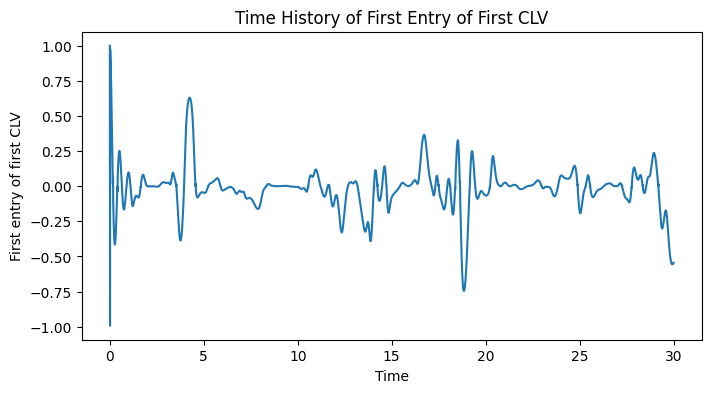

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(t_loaded, CLVs[:, 0, 0])
plt.xlabel("Time")
plt.ylabel("First entry of first CLV")
plt.title("Time History of First Entry of First CLV")
plt.show()

In [3]:
time = np.array([2.584674835205078, 13.388611555099487, 39.79172968864441, 182.33472967147827, 758.9047939777374])
dim = np.array([64, 128, 256, 512, 1024])

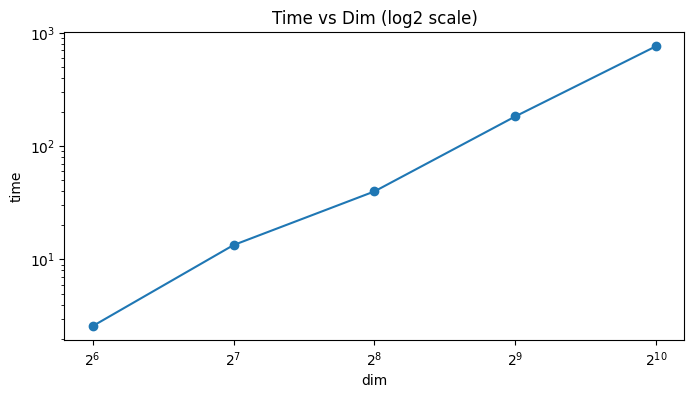

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(dim, time, marker='o')
plt.xscale("log", base=2)
plt.yscale("log", base=10)
plt.xlabel("dim")
plt.ylabel("time")
plt.title("Time vs Dim (log2 scale)")
plt.show()